### [np.stack](https://stackoverflow.com/questions/43673093/what-is-this-sequence-of-arrays-created-by-numpys-np-stack-function-in-python)

> <font color="red">np.stack</font>

    >>> a = np.array([1, 2, 3])
    >>> b = np.array([2, 3, 4])
    >>> np.stack((a, b), axis=0)
    array([[1, 2, 3],
           [2, 3, 4]])
    >>> np.stack((a, b), axis=1)
    array([[1, 2],
           [2, 3],
           [3, 4]])
           
### [np.vstack, np.hstack](https://blog.csdn.net/u012609509/article/details/70319293)

> <font color="red">np.vstack(tup)</font>

    >>> arr1 = np.array([1, 2, 3])
    >>> arr2 = np.array([4, 5, 6])
    >>> res = np.vstack((arr1, arr2))

    array([[1, 2, 3],
           [4, 5, 6]])
       
--

> <font color="red">np.hstack(tup)</font>

    >>> arr1 = np.array([1, 2, 3])
    >>> arr2 = np.array([4, 5, 6])
    >>> res = np.hstack((arr1, arr2))

    [1 2 3 4 5 6]

    --

    >>> arr1 = np.array([[1, 2], [3, 4], [5, 6]])
    >>> arr2 = np.array([[7, 8], [9, 0], [0, 1]])
    >>> res = np.hstack((arr1, arr2))

    [[1 2 7 8]
     [3 4 9 0]
     [5 6 0 1]]

In [1]:
import numpy as np

In [2]:
>>> a = np.array([1, 2, 3])
>>> b = np.array([2, 3, 4])
>>> np.stack((a, b), axis=0)

array([[1, 2, 3],
       [2, 3, 4]])

In [3]:
>>> a = np.array([1, 2, 3])
>>> b = np.array([2, 3, 4])
>>> np.stack((a, b), axis=1)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [4]:
>>> a = np.array([1, 2, 3])
>>> b = np.array([2, 3, 4])
>>> np.stack((a, b), axis=-1)

array([[1, 2],
       [2, 3],
       [3, 4]])

### HSV

Hue（色相）

Saturation（飽和度）

Value（明度）

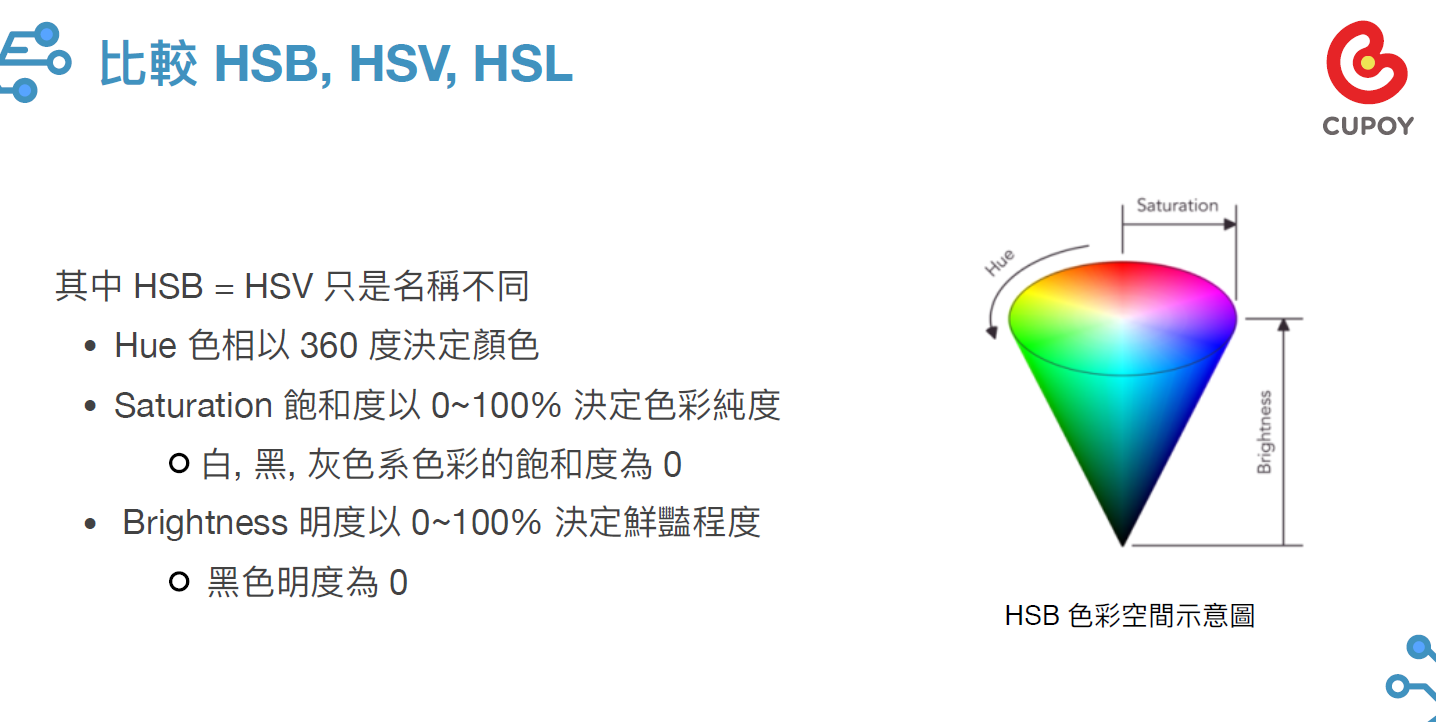

## 直方圖均衡 (Histogram Equalization)

> 當我們想增強對比的時候，可以考慮使用直方圖均衡的方式

- 對比不強：顏色的值集中在某個區域

- 增強對比：透過數學公式將值分散到 0~255 區間

--

雖然 [Wiki](https://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE%E5%9D%87%E8%A1%A1%E5%8C%96) 中有提到直⽅方圖均衡主要是處理理灰圖

我們也可以個別對 RGB 的 3 個 channel 做直⽅方圖均衡


### 縱覽

這種方法通常用來增加許多圖像的全局對比度，尤其是當圖像的有用數據的對比度相當接近的時候。通過這種方法，亮度可以更好地在直方圖上分布。這樣就可以用於增強局部的對比度而不影響整體的對比度，直方圖均衡化通過有效地擴展常用的亮度來實現這種功能。

<font color="red">這種方法對於背景和前景都太亮或者太暗的圖像非常有用</font>，這種方法尤其是可以帶來X光圖像中更好的骨骼結構顯示以及曝光過度或者曝光不足照片中更好的細節。這種方法的一個主要優勢是它是一個相當直觀的技術並且是可逆操作，如果已知均衡化函數，那麼就可以恢復原始的直方圖，並且計算量也不大。<font color="red">這種方法的一個缺點是它對處理的數據不加選擇，它可能會增加背景雜訊的對比度並且降低有用訊號的對比度</font>。


## Sample Code & 作業內容


### 實作各種不一樣的方式來調整飽和 / 對比 / 明亮

- 改變 color space 來調整飽和度

- 實作直方圖均衡

        - 對 RGB 圖直接處理
        - 改變 color space 改明亮度
    
- alpha/ beta 調整對比 / 明亮

        - alpha=2.0, beta= 0
        - alpha=1.0, beta=50

## 範例
實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變到 HSL color space 來調整飽和度

1. 對灰階圖實作直方圖均衡

1. alpha/ beta 調整對比 / 明亮

In [5]:
import cv2
import numpy as np

img_path = '../Day_001_HW/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度
轉換成 HLS color space, 改變 s channel 的值

In [6]:
# 為了要改變飽和度，我們先把 color space 轉成 HSL 格式 (OpenCV 表示順序是 HLS)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HLS color space 減少飽和度
img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - change_percentage
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')

# 在 HLS color space 增加飽和度
img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1]/255 + change_percentage
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1]*255
img_hls_up = img_hls_up.astype('uint8')

# 轉換
img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2BGR)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2BGR)

# 組合圖片 + 顯示圖片
img_hls_change = np.hstack((img, img_hls_down, img_hls_up))
while True:
    cv2.imshow('change saturation', img_hls_change)
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 直方圖均衡

In [7]:
# 轉為灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 灰階圖片直方圖均衡
img_gray_equal = cv2.equalizeHist(img_gray)

# 組合圖片 + 顯示圖片
img_gray_equalHist = np.hstack((img_gray, img_gray_equal))
while True:
    # 比較灰階圖片是否有做直方圖均衡的差異
    cv2.imshow('gray equal histogram', img_gray_equalHist)

    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 調整對比 / 明亮

In [8]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 作業
實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
1. 實作直方圖均衡
1. alpha/ beta 調整對比 / 明亮

In [9]:
import cv2
import numpy as np

img_path = '../Day_001_HW/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度
轉換成 HSV color space, 改變 s channel 的值

In [10]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[..., -1] = img_hsv_down[..., -1]/255 - change_percentage
img_hsv_down[img_hsv_down[..., -1] < 0] = 0
img_hsv_down[..., -1] = img_hsv_down[..., -1]*255
img_hsv_down = img_hsv_down.astype('uint8')


# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., -1] = img_hsv_up[..., -1]/255 + change_percentage
img_hsv_up[img_hsv_up[..., -1] > 1] = 1
img_hsv_up[..., -1] = img_hsv_up[..., -1]*255
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
while True:
    cv2.imshow('change saturation', img_hsv_change)
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 直方圖均衡

case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來

case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [11]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = [img[..., 0], img[..., 1], img[..., 2]]
equalHist_by_channel = [cv2.equalizeHist(x) for x in equalHist_by_channel]
# 組合經過直方圖均衡的每個 channel
img_bgr_equal = np.stack(equalHist_by_channel, axis=-1) # axis=-1 (or 2 -> 因為這邊剛好是3個channel吧)

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv[..., -1] = cv2.equalizeHist(img_hsv[..., -1])   # 都跟隨上方的 -1 (or 2 -> 因為這邊剛好是3個channel吧)
img_hsv_equal = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
while True:
    # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
    cv2.imshow('bgr equal histogram', img_bgr_equalHist)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 調整對比 / 明亮

In [12]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=3.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=100)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 推薦延伸閱讀

## [Histogram Equalization OpenCV](https://jason-chen-1992.weebly.com/home/-histogram-equalization) 
該 blog 詳細講解 Histogram Equalization 的數學式，並且有圖幫助了解

-

### 一、灰階直方圖 Histogram
> 而在影像上，我們會應用於統計一張圖片裡面<font color="dodgerblue">各灰階值出現的頻率</font>。e.g.
![img1](https://jason-chen-1992.weebly.com/uploads/1/0/8/5/108557741/histogram_orig.jpg)
於是乎就能很輕易的觀察這張影像整體偏暗或偏亮(即分佈靠左或靠右)，而再對它進行調整，常見的修圖軟體如Photoshop(PS) 一般也都會提供像這樣的Histogram 資訊給你看，方便你修照片。



### 二、均衡化 Equalization
> 在了解了什麼是Histogram 後，那我們再來聊聊什麼是Histogram Equalization。在Histogram 的分佈中我們可以觀察到，
<font color="red">如果 Histogram 分佈的峰值 靠近左側(靠近0)，則代表這張影像偏暗</font>；
<font color="red">如果 Histogram 分佈的峰值 靠近右側(靠近255 )，則代表這張影像偏亮</font>；
<font color="red">如果 Histogram 分佈的峰值 非常集中在中間，則明暗的對比就不太明顯</font>。

講到這裡你大概也可以想像，<font color="red">Histogram 最理想分佈狀況就是平均分佈</font>，而這就是我們接下來要介紹的 Equalization。

> ![img2](https://jason-chen-1992.weebly.com/uploads/1/0/8/5/108557741/histogrammeinebnung_orig.png)

> 上圖的 Transition function ( T ) 利用的是：累積分佈函數(Cumulative Distribution Function , CDF)，而所謂的 CDF 其實就是 機率密度函數(PDF) 的積分。
在數位(Digital)影像中(離散)，積分就是相加，所以我們可以整理出實作步驟如下：
1. Source Image -> Histogram
1. 利用 Histogram 算出各個灰階值的 PDF
1. 將PDF 做累加求出 CDF
1. 將CDF 的結果 四捨五入後做出對照表
1. 透過查詢剛剛建立的對照表，決定Transition 完各個灰階值的機率

![img3](https://jason-chen-1992.weebly.com/uploads/1/0/8/5/108557741/histogram-equalization_1_orig.jpg)


![img4](https://jason-chen-1992.weebly.com/uploads/1/0/8/5/108557741/histogram-result_orig.jpg)

![img5](https://jason-chen-1992.weebly.com/uploads/1/0/8/5/108557741/h-e-test_orig.jpg)

--

## [OpenCV 官方文件](https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html)
裡面有額外提到一種調整明亮度的方式叫做gamma correlation，相較於 alpha/beta 的調整，他對飽和度的影響會比較低


The following code performs the operation $ g(i,j)=α⋅f(i,j)+β $ :

    from __future__ import print_function
    from builtins import input
    import cv2 as cv
    import numpy as np
    import argparse
    # Read image given by user
    parser = argparse.ArgumentParser(description='Code for Changing the contrast and brightness of an image! tutorial.')
    parser.add_argument('--input', help='Path to input image.', default='lena.jpg')
    args = parser.parse_args()
    image = cv.imread(cv.samples.findFile(args.input))
    if image is None:
        print('Could not open or find the image: ', args.input)
        exit(0)
    new_image = np.zeros(image.shape, image.dtype)
    alpha = 1.0 # Simple contrast control
    beta = 0    # Simple brightness control
    # Initialize values
    print(' Basic Linear Transforms ')
    print('-------------------------')
    try:
        alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
        beta = int(input('* Enter the beta value [0-100]: '))
    except ValueError:
        print('Error, not a number')
    # Do the operation new_image(i,j) = alpha*image(i,j) + beta
    # Instead of these 'for' loops we could have used simply:
    # new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
    # but we wanted to show you how to access the pixels :)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    cv.imshow('Original Image', image)
    cv.imshow('New Image', new_image)
    # Wait until user press some key
    cv.waitKey()
